SEGUIR HACIENDO BONITO EL NOTEBOOK Y ESO (OUTLIERS)
TENGO QUE:

- Terminar el EDA y hacerlo bonito
    - Hago graficas con plotly?
    - Hilo narrativo


- Arreglar el notebook

- Hacer un README

- Subirlo a github
    - Hago un venv y lo subo tmb?


- Hacer el espacio interactivo?




PREGUNTAS PARA DEMETRIO:

- COMO HACER EL ESPACIO INTERACTIVO

- COMO HACER PARA QUE SE MUESTREN LAS FIGURAS DE PLOTLY



COSAS QUE HACER:


# HACERME UN CROQUIS

Acabar con el preprocesamiento --> decidir que hago con los valores nulos

EDA --> representaciones basicas de distintas columnas

MAS COSAS


Orden del trabajo:

Cargar los datos --> primera visualizacion (head, info, describe y como mucho algun grafico pero ya)

Preprocesamiento --> mirar (y quitar) valores nulos (imputar), duplicados (quitarlos), outliers(rango intercuartilico) 

Visualizacion --> variables categoricas. discretas. Continuas.
    - Relacion entre variables (con survived) --> univariate, bivariate (cuadrado 2x2), multivariate (heatmap)
    - Porcentajes (24% de Pclass 3 se salvaron)


Encoding (si se fuese a hacer algo con ML)


Sacar nueva información--> usar datos ya existentes, o adicionales que encontremos para sacar nueva informacion

- Familias: ver por ejemplo el porcentaje de supervivencia de las familias, la supervivencia de un ind segun el tamaño de su familia a bordo

- Cabinas --> 

    ver la relacion de gente de una misma cabina que ha sobrevivido y que no

    Donde estaban esas cabinas?? La letra del principio (B26, E17) hace referencia al lugar de la cabina (?) -> mirar relacion con supervivencia

- Clases --> Distribucion segun clases de edad y supervivencia

- Donde atracaron

- DONDE FUERON RESCATADOS

- Mirar tripulacion (titulos)

- 

# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.




# Titanic Dataset Variables

<div align="center">

| Variable     | Description                                                                 | Possible Values                                                                 |
|:------------:|:---------------------------------------------------------------------------:|:-------------------------------------------------------------------------------:|
| PassengerId  | Unique identifier for each passenger                                        | Integer values                                                                  |
| Survived     | Survival indicator                                                          | 0 = No, 1 = Yes                                                                 |
| Pclass       | Passenger class                                                             | 1 = 1st, 2 = 2nd, 3 = 3rd                                                       |
| Name         | Name of the passenger                                                       | String values                                                                   |
| Sex          | Gender of the passenger                                                     | male, female                                                                    |
| Age          | Age of the passenger                                                        | Float values                                                                    |
| SibSp        | Number of siblings/spouses aboard the Titanic                               | Integer values                                                                  |
| Parch        | Number of parents/children aboard the Titanic                               | Integer values                                                                  |
| Ticket       | Ticket number                                                               | String values                                                                   |
| Fare         | Passenger fare                                                              | Float values                                                                    |
| Cabin        | Cabin number                                                                | String values, 'UNK' for unknown                                                |
| Embarked     | Port of embarkation                                                         | C = Cherbourg, Q = Queenstown, S = Southampton                                  |
| alone        | Whether the passenger was alone                                             | True, False                                                                     |
| deck         | Deck level                                                                  | A, B, C, D, E, F, G, UNK                                                        |

</div>

This table provides a comprehensive overview of the variables in the Titanic dataset, their descriptions, and possible values for key categorical variables.


# Import libraries

In [158]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

from sklearn.preprocessing import OneHotEncoder


# Import functions

In [159]:
import functions as f

# Data loading

Que visualizaciones podemos hacer??

- Distribucion de la edad
- Distribucion de precios

- Distribucion de: (comparando p ej vivos y muertos)
    - Edad
    - Pclass
    - sexo
    - Fare
    - Embarked


# Exploratory Data Analysis

## Data Cleaning 

In this section, we perform data cleaning and preprocessing tasks on the Titanic dataset. The main steps include:

- **Handling Missing Values**:

    - We impute missing values in the `Age` column by calculating the median age for groups based on `Pclass` and `Sex`.
    - Missing values in the `Cabin` and `deck` columns are replaced with `UNK` (unknown).
    - Missing values in the `Embarked` column are replaced with the mode (most frequent value).
- **Feature Engineering**:
    - We create a new column `n_fam` that represents the total number of family members aboard by summing `SibSp` and `Parch`.
    - We perform one-hot encoding on the `Sex` and `Embarked` columns to convert categorical variables into numerical format.
    - A new binary column `has_deck` is created to indicate whether a passenger has a cabin (deck) or not.

In [160]:
#Read data from the csv file and store it in a pandas dataframe
df = pd.read_csv(r'titanic.csv')

#Take the titanic dataset from seaborn to add additional information
df_complementario = sns.load_dataset('titanic')

df = pd.concat([df, df_complementario[['alone', 'deck']]], axis=1)


In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  alone        891 non-null    bool    
 13  deck         203 non-null    category
dtypes: bool(1), category(1), float64(2), int64(5), object(5)
memory usage: 85.7+ KB


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [164]:
#Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
deck           688
dtype: int64

In [165]:
#Check for duplicated rows
df[df.duplicated()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck


In [166]:
df[df.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,True,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,False,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,NaN


### Handling missing values


We see that there are no duplicated rows, but we find several null values in different columns. To deal with them, we will follow different procedures

For the `Age` column, we will use group-wise imputation with the columns `Sex` and `Pclass`. 

In the `Cabin` and `deck` columns 77.2% of the values are missing. Therefore, we will create the class `UNK` for all missing values.

Then, for the `Embarked` column there are 2 missing values, so we will keep it simple and use the mode to impute them. 

#### `Age`

In [167]:
#Create a function for imputing missing values
def impute_age(row):
    #Calculate the median age when grouping by Pcalss and sex
    age_medians = df.groupby(['Pclass', 'Sex'])['Age'].median()
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex']]
    else:
        return row['Age']
    
df['Age'] = df.apply(impute_age, axis=1)


In [168]:
#We check for the missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
deck           688
dtype: int64

#### `Cabin` and `deck`

In [169]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [170]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [171]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [172]:
df['deck'].value_counts()


deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [173]:

df['Cabin'] = df['Cabin'].fillna('UNK')

#In this case, the column deck is a cathegory, so we change it to a string for easier handling. 
df['deck'] = df['deck'].astype('str')
df['deck'] = df['deck'].replace('nan', 'UNK')


In [174]:
#We check the missing values 
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
alone          0
deck           0
dtype: int64

#### `Embarked`


In [175]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [176]:
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [177]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [178]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
alone          0
deck           0
dtype: int64

Ale, ya no tenemos mising values, podemos continuar

### Feature engineering

In [179]:
# Create a new column 'n_fam' that represents the total number of family members aboard
df['n_fam'] = df['SibSp'] + df['Parch']

# Create a new binary column 'has_deck' to indicate whether a passenger has a cabin (deck) or not
df['has_deck'] = np.where(df['deck'] == 'UNK', 0, 1)


In [180]:
#use one-hot encoding to encode the Sex and Embarked columns
encoding_cols=['Sex', 'Embarked']
df_encoded = pd.get_dummies(df, columns=encoding_cols, drop_first=False)

encoded_cols = [i + '_' + j for i in encoding_cols for j in df[i].unique()]
df_encoded[encoded_cols]

,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,True,False,True,False,False
1,False,True,False,True,False
2,False,True,True,False,False
3,False,True,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
886,True,False,True,False,False
887,False,True,True,False,False
888,False,True,True,False,False
889,True,False,False,True,False


In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
n_fam,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000
has_deck,891.0,0.227834,0.419670,0.00,0.0000,0.0000,0.0,1.0000


## Univariate Analysis
In this section, we perform univariate analysis on the Titanic dataset. The main steps include:

- **Categorical Variables**:
    - We analyze the distribution of categorical variables such as `Survived`, `Pclass`, `Sex`, `n_fam`, `Embarked`, `alone`, `has_deck`, and `deck`.
    - Visualizations are created to understand the frequency and distribution of these variables.
    - We are importing the function `cathegorical_simple` to construct the plots.

- **Numerical Variables**:
    - We analyze the distribution of numerical variables such as `Age` and `Fare`.
    - Visualizations are created to understand the central tendency, dispersion, and shape of the distribution of these variables.
    - We are importing the function `numerical_simple` to construct the plots.


### Cathegorical variables

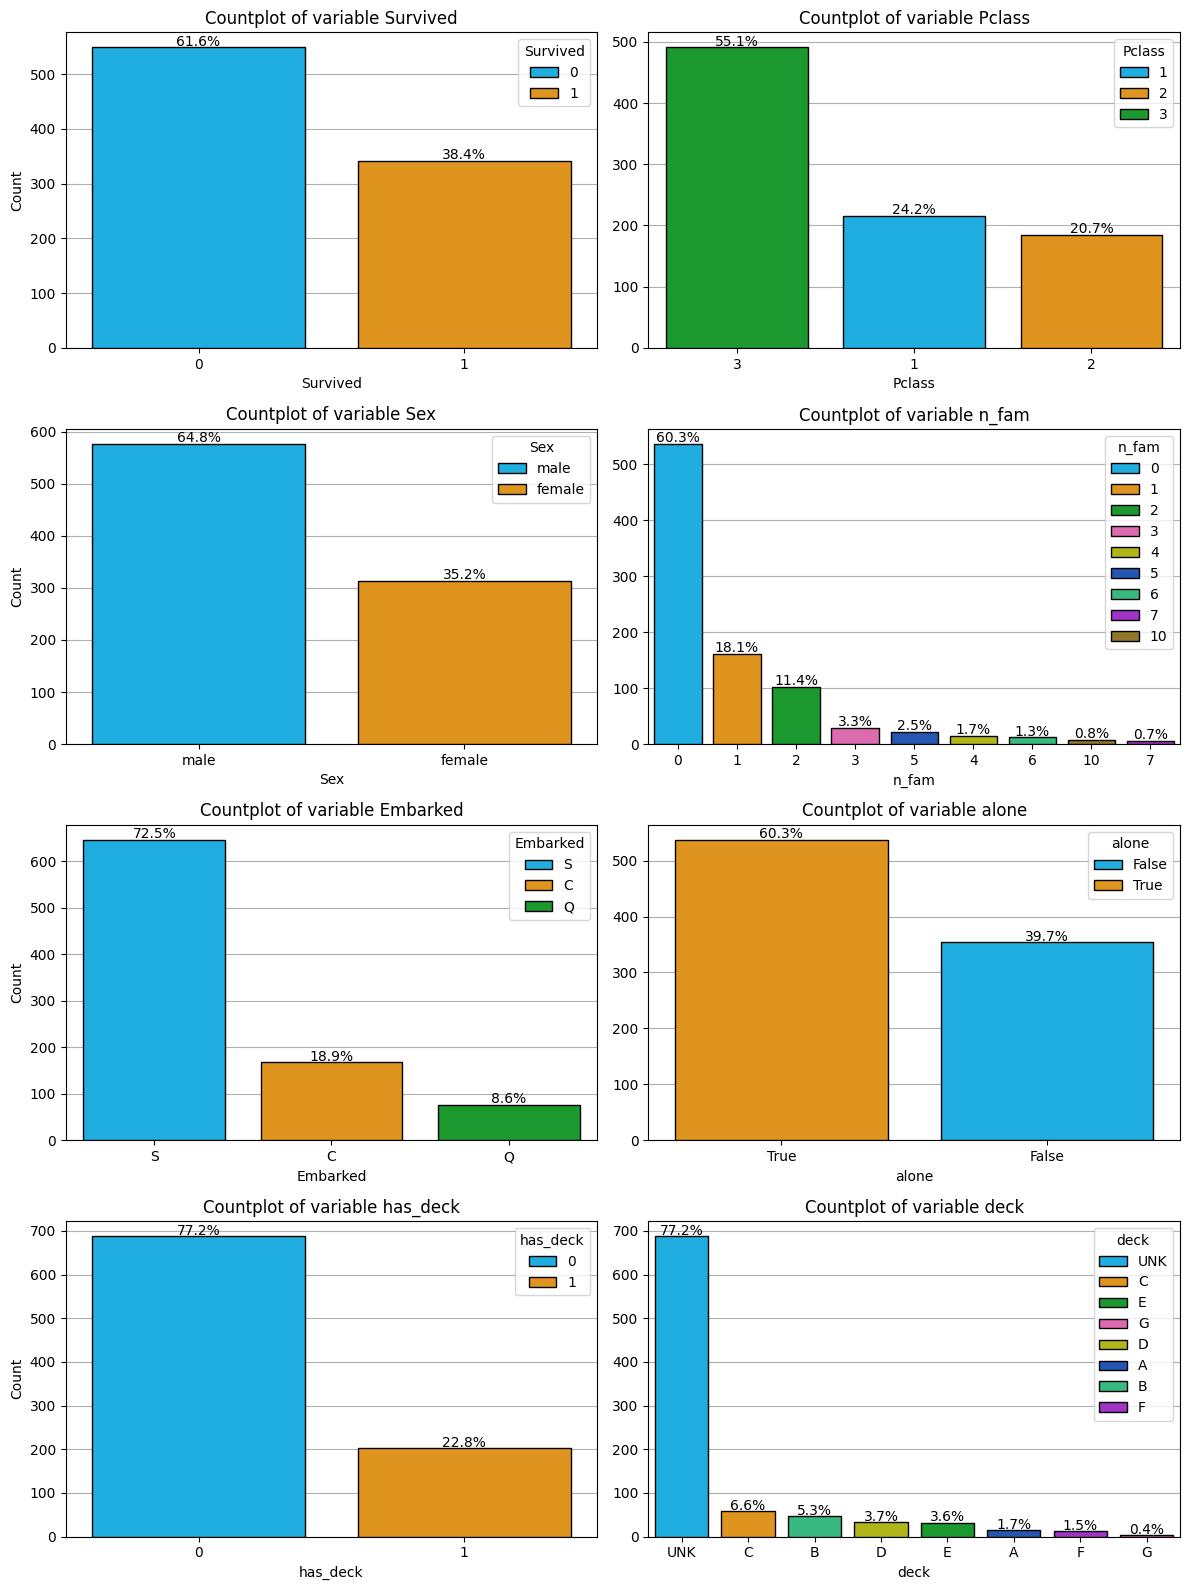

In [182]:
variables = ['Survived', 'Pclass', 'Sex', 'n_fam' ,'Embarked', 'alone', 'has_deck', 'deck']

f.cathegorical_simple(df = df, variables = variables)


The results seem correct at first glance. We will investigate further in more detail later.

### Numerical variables

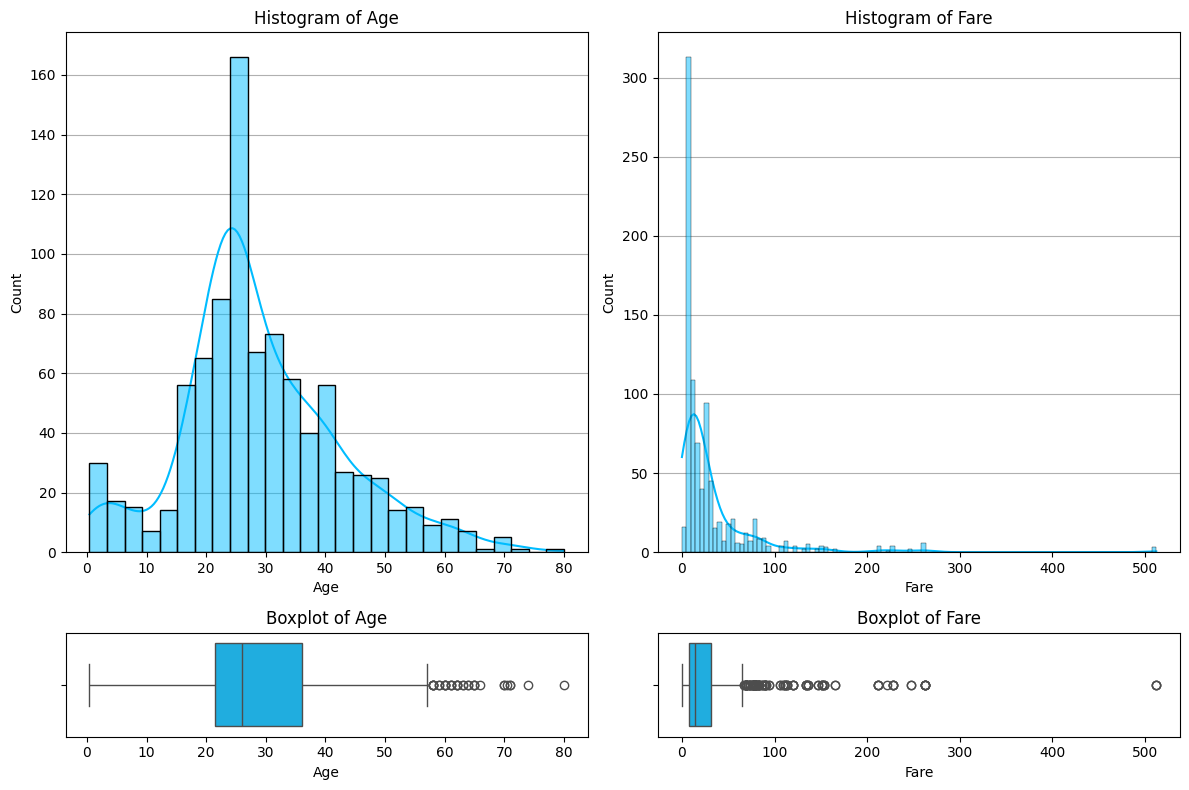

In [183]:
variables = ['Age', 'Fare']
f.numerical_simple(df, variables)

When analyzing the numerical variables in the dataset, we observe that the `Fare` variable exhibits unusual behavior, with extremely high values. These extreme values can be considered outliers and need to be analyzed in more depth to determine their impact on the overall dataset analysis. The presence of these outliers can distort statistical measures and visualizations, so it is crucial to address them appropriately.

## Outlier detection and removal

In this section, we focus on identifying and removing outliers from the Titanic dataset. The main steps include:

- **Identifying Outliers**:
    - We use statistical methods such as the interquartile range (IQR) to detect outliers in the `Fare` column.
    - Visualizations are created to better understand the distribution of the `Fare` values and identify extreme values.

- **Removing Outliers**:
    - We filter out the outliers based on the calculated IQR bounds.
    - We also explore alternative methods for outlier removal to ensure a more accurate representation of the `Fare` distribution.

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
n_fam,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000
has_deck,891.0,0.227834,0.419670,0.00,0.0000,0.0000,0.0,1.0000


The `Fare` column shows a great standard deviation (49.7), compared to its mean value (32.2). Therefore, we will use a violin plot to better see the data.

In [185]:
#Represent the distribution of the Fare column using a violin plot
fig = px.violin(df, y='Fare', box=True, points="all", hover_data=df.columns)
fig.update_layout(width=800, height=600)  # Adjust the width and height as needed

fig.show()

In [186]:
#Remove outliers from the Fare column by filtering out values that fall below the lower bound and above the upper bound
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_cleanFare = df[(df['Fare'] > lower_bound) & (df['Fare'] < upper_bound)]

In [187]:
df_cleanFare.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,775.0,445.806452,260.116285,1.00,213.5000,450.0,670.5,891.0
Survived,775.0,0.339355,0.473796,0.00,0.0000,0.0,1.0,1.0
Pclass,775.0,2.480000,0.734390,1.00,2.0000,3.0,3.0,3.0
Age,775.0,28.417742,13.065831,0.42,21.5000,25.0,35.0,80.0
SibSp,775.0,0.437419,0.899838,0.00,0.0000,0.0,1.0,5.0
Parch,775.0,0.340645,0.785914,0.00,0.0000,0.0,0.0,6.0
Fare,775.0,17.822091,13.578085,0.00,7.8958,13.0,26.0,65.0
n_fam,775.0,0.778065,1.416873,0.00,0.0000,0.0,1.0,7.0
has_deck,775.0,0.145806,0.353140,0.00,0.0000,0.0,0.0,1.0


In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
n_fam,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000
has_deck,891.0,0.227834,0.419670,0.00,0.0000,0.0000,0.0,1.0000


In [189]:
#Represent the distribution of the Fare column after removing outliers 
fig = px.violin(df_cleanFare, y='Fare', box=True, points="all", hover_data=df.columns)
fig.update_layout(width=800, height=600)  # Adjust the width and height as needed

fig.show()

With this method, we have removed 13% of the individuals from the dataset. This is quite a big portion given the size of the dataset. 

Therefore, the interquartile method is not the best suited for this job. By looking at the previous violin plot of the whole dataset, we can see that there are 3 values above 500, while the rest do not even surpass 300. Such a big difference makes the standard deviation and the interquartile sectors  

Therefore, the interquartile method is not the best suited for this job. By looking at the previous violin plot of the whole dataset, we can see that there are 3 values above 500, while the rest do not even surpass 300. Such a big difference makes the standard deviation and the interquartile sectors not representative of the majority of the data. Hence, I prefer to remove the values over the threshold of 500 to get a more accurate representation of the `Fare` distribution. 

In [190]:
df_cleanFare = df[df['Fare'] < 500]
df = df_cleanFare

In [191]:
#Represent the distribution of the Fare column after removing outliers 
fig = px.violin(df, y='Fare', box=True, points="all", hover_data=df.columns)
fig.update_layout(width=800, height=600)  # Adjust the width and height as needed

fig.show()

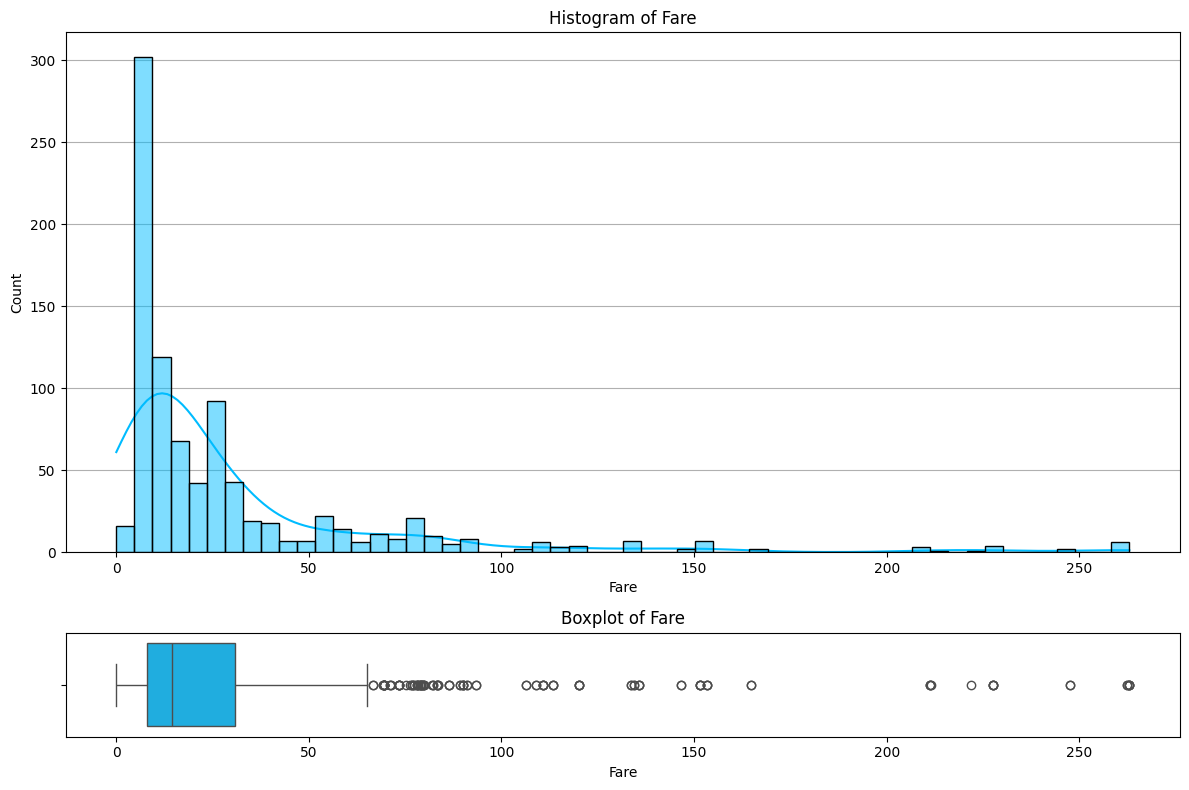

In [192]:
f.numerical_simple(df, ['Fare'])


## Bivariate Analysis

In this section, we perform bivariate analysis on the dataset. The main steps include:

- **Categorical Pairs**:
    - We analyze the relationships between pairs of categorical variables.
    - Visualizations are created to understand the interactions and dependencies between these variables.
    - We are importing the function `cathegorical_pairs` to construct the plots.

- **Numerical Pairs**:
    - We analyze the relationships between pairs of numerical variables.
    - Visualizations are created to understand the correlations and patterns between these variables.
    - We are importing the function `numerical_pairs` to construct the plots.

- **Mixed Pairs**:
    - We analyze the relationships between numerical and categorical variables.
    - Visualizations are created to understand how numerical variables vary across different categories.
    - We are importing the function `mixed_pairs` to construct the plots.


### Cathegorical pairs

We plot all the combinations that may be valuable and informative. 

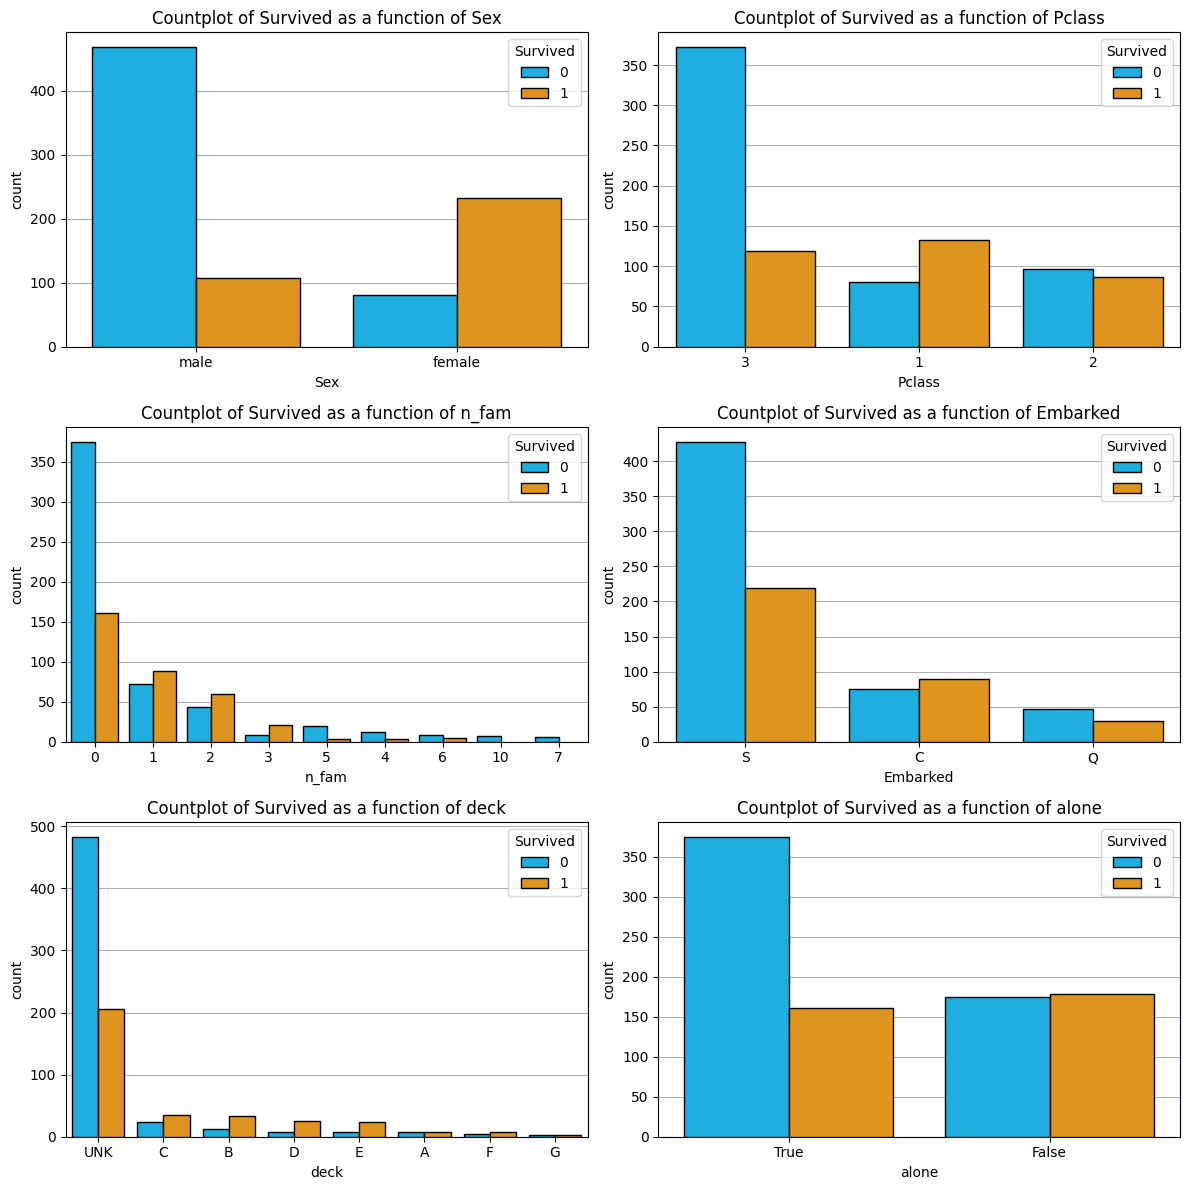

In [193]:
# Plotting all variables (ind) against Survived (dep)

ind_variables = ['Sex', 'Pclass','n_fam', 'Embarked', 'deck', 'alone']
dep_variable = 'Survived'

f.cathegorical_pairs(df, dep_variable, ind_variables)

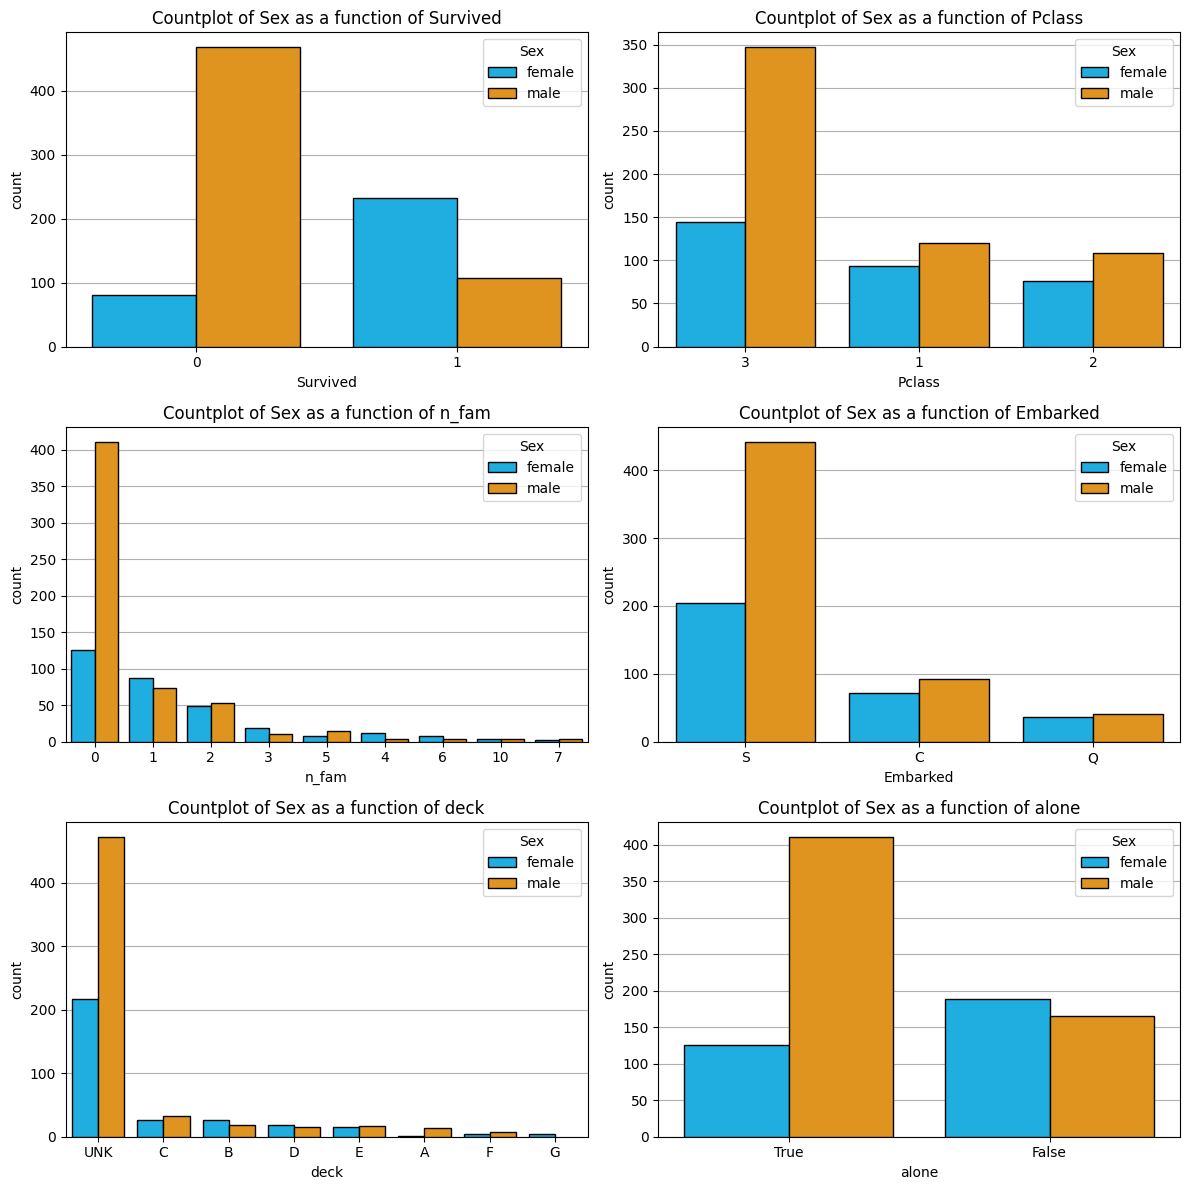

In [194]:
# Plotting all variables against Sex

dep_variables = ['Survived', 'Pclass', 'n_fam', 'Embarked', 'deck', 'alone']
ind_variable = 'Sex'

f.cathegorical_pairs(df, ind_variable, dep_variables)

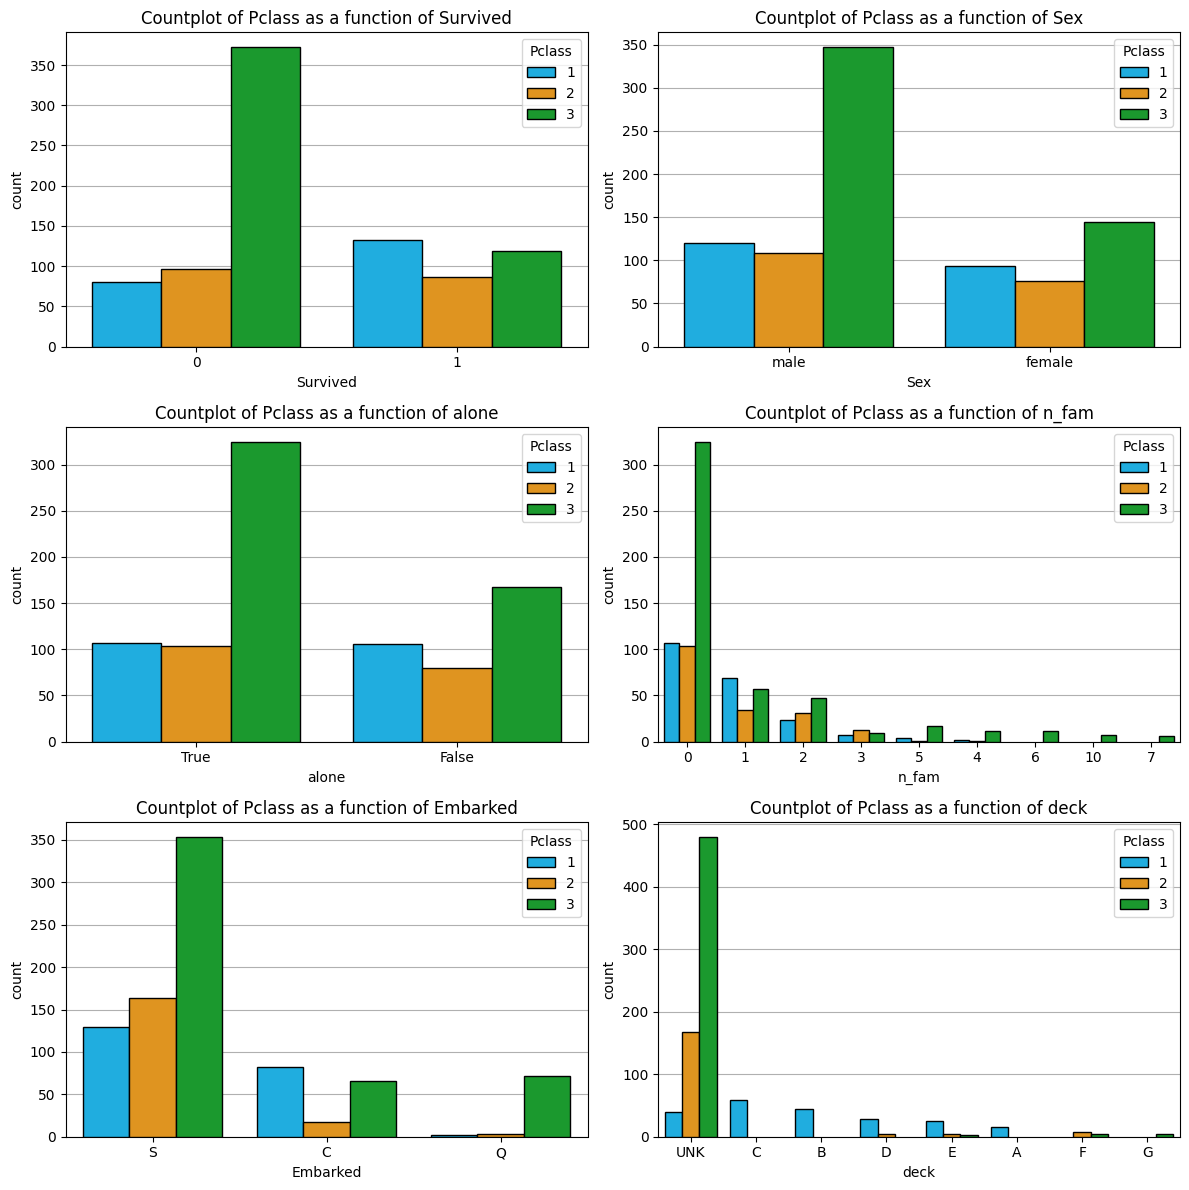

In [216]:
# Plotting all variables against Pclass

dep_variables = ['Survived', 'Sex', 'alone', 'n_fam', 'Embarked', 'deck']
ind_variable = 'Pclass'

f.cathegorical_pairs(df, ind_variable, dep_variables)

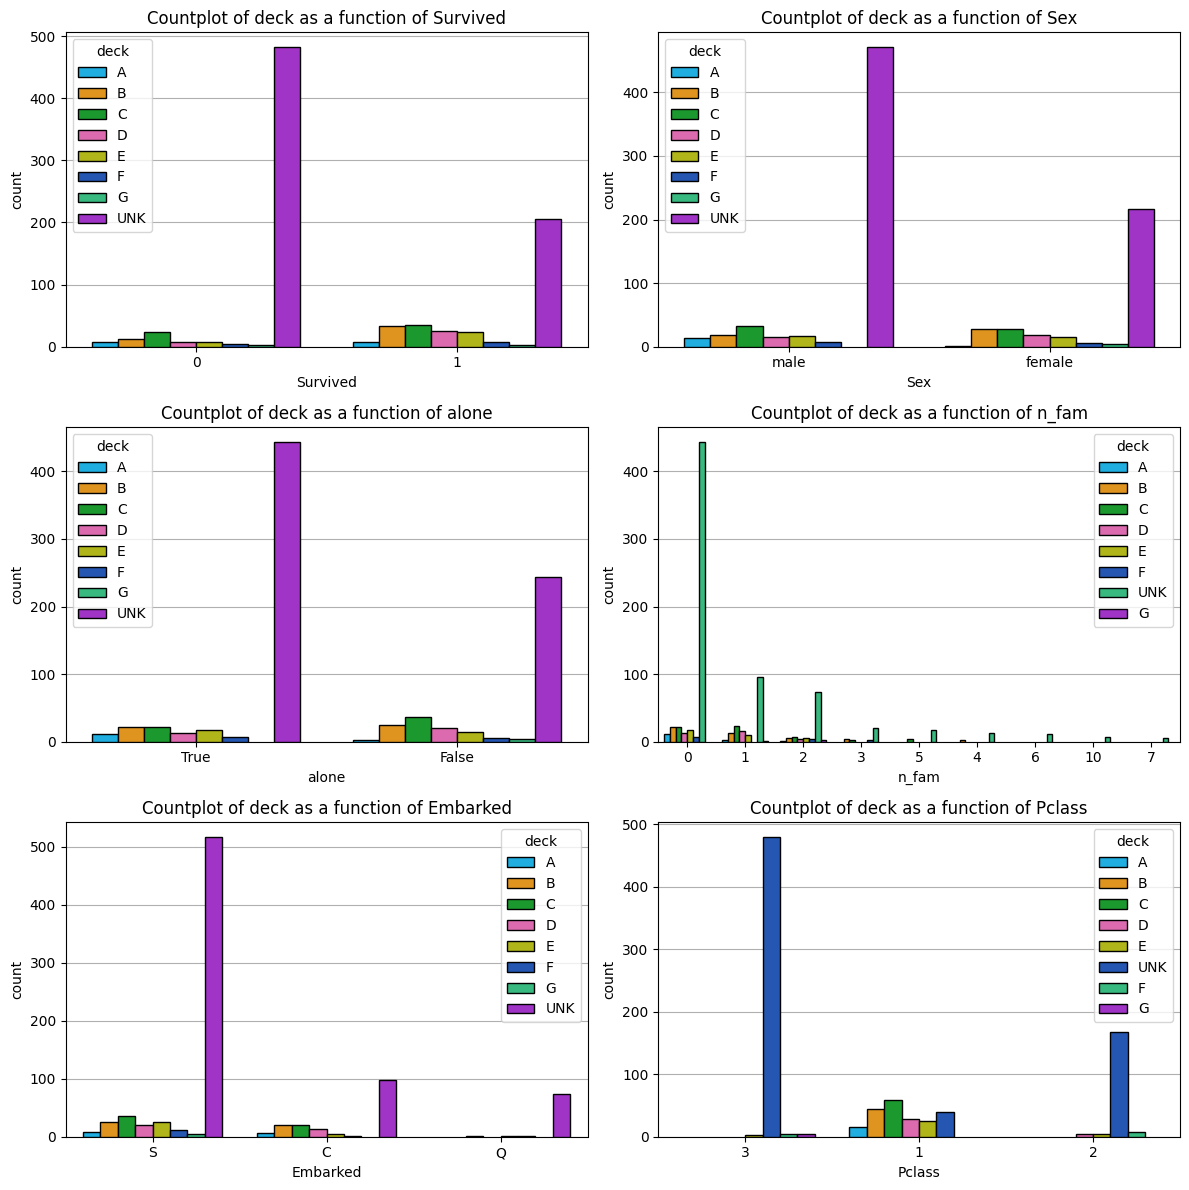

In [218]:
# Plotting all variables against deck

dep_variables = ['Survived', 'Sex', 'alone', 'n_fam', 'Embarked', 'Pclass']
ind_variable = 'deck'

f.cathegorical_pairs(df, ind_variable, dep_variables)

**Analysis summary**:
  
The analysis of this section reveals a significant group of individuals who share the following characteristics:
- Gender: Male
- Class: Third class
- Traveling alone
- No assigned cabin
- Embarked at Southampton
- Did not survive

This group is notably larger than other groups with different conditions.

### Numerical pairs

Now we represent the two numerical variables: `Age` and `Fare` 

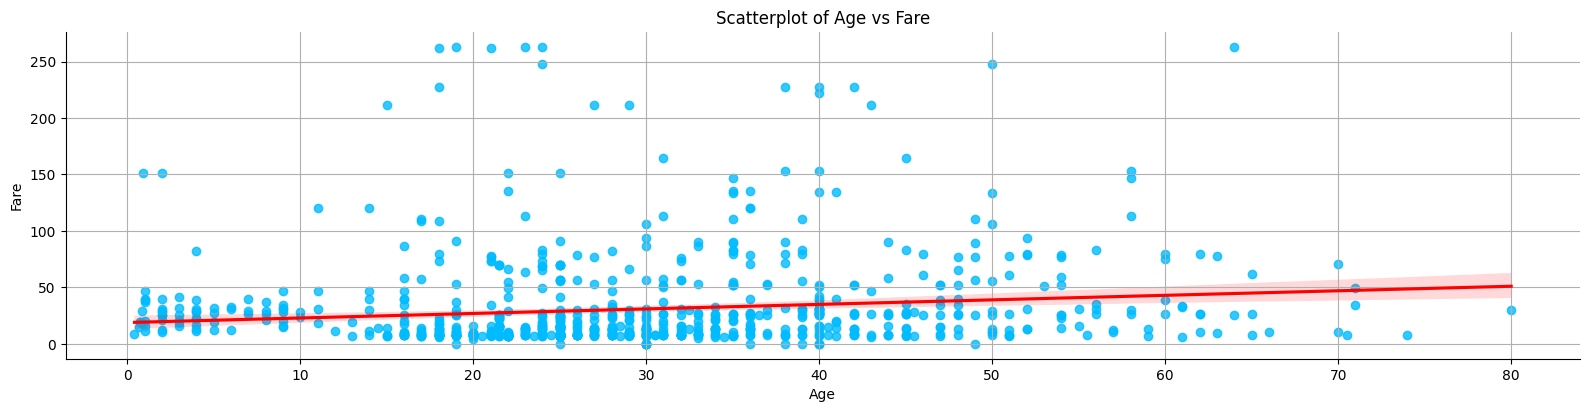

In [196]:
#Compare Age vs Fare with the initial dataset

f.numerical_pairs(df = df, x_var = 'Age', y_var = 'Fare')


The analysis of the numerical pairs shows a subtle positive correlation, but it is not very significant.

### Mixed pairs

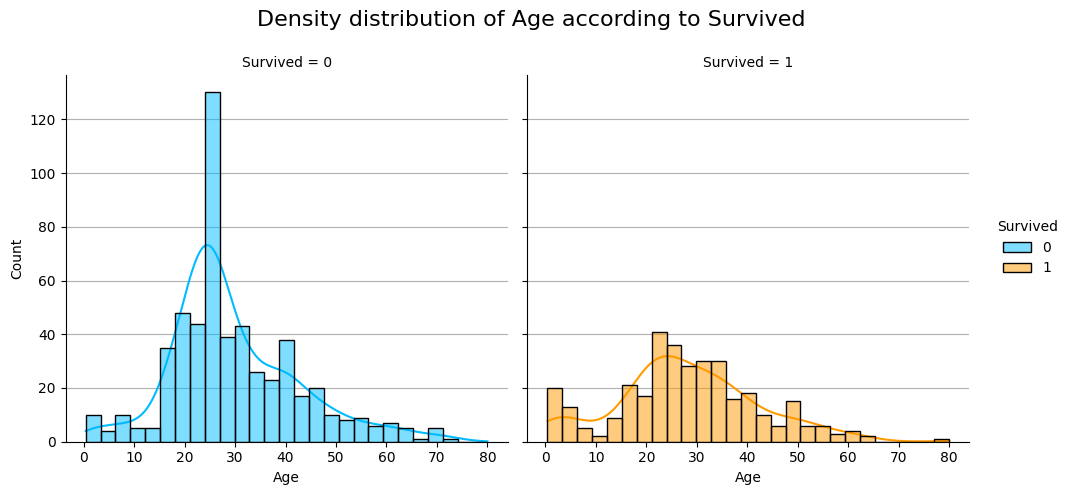

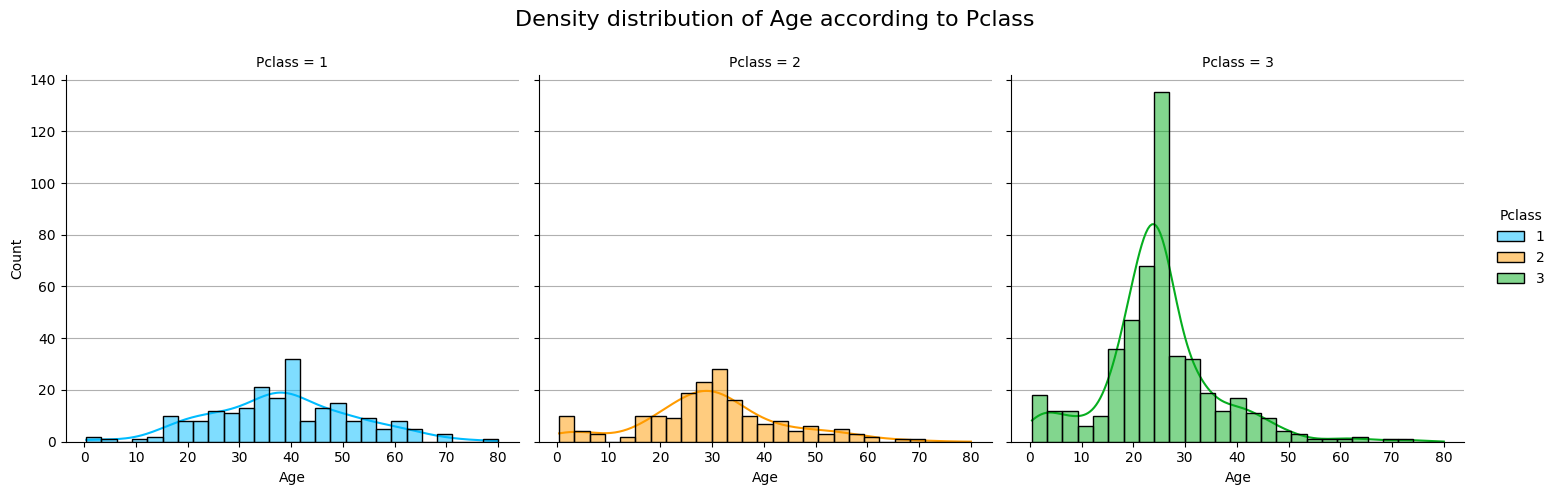

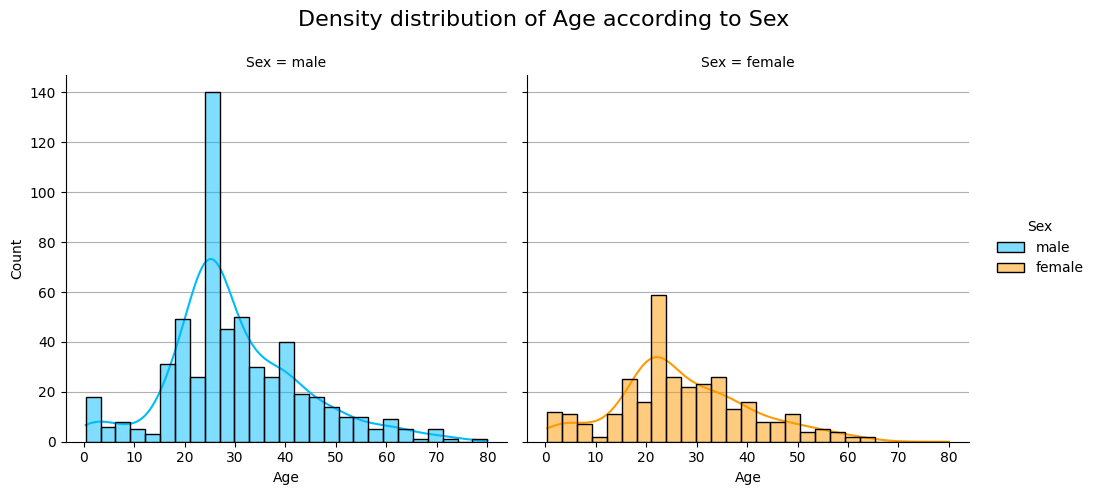

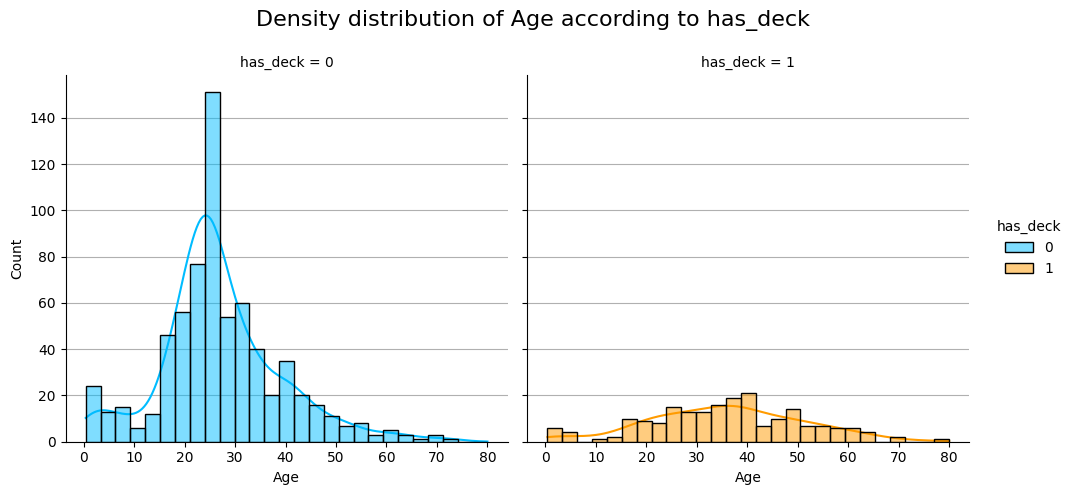

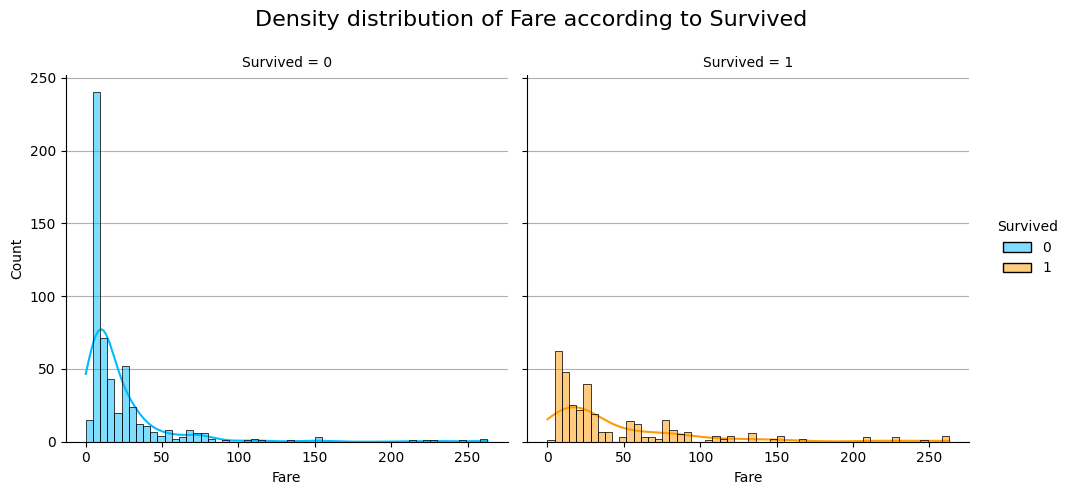

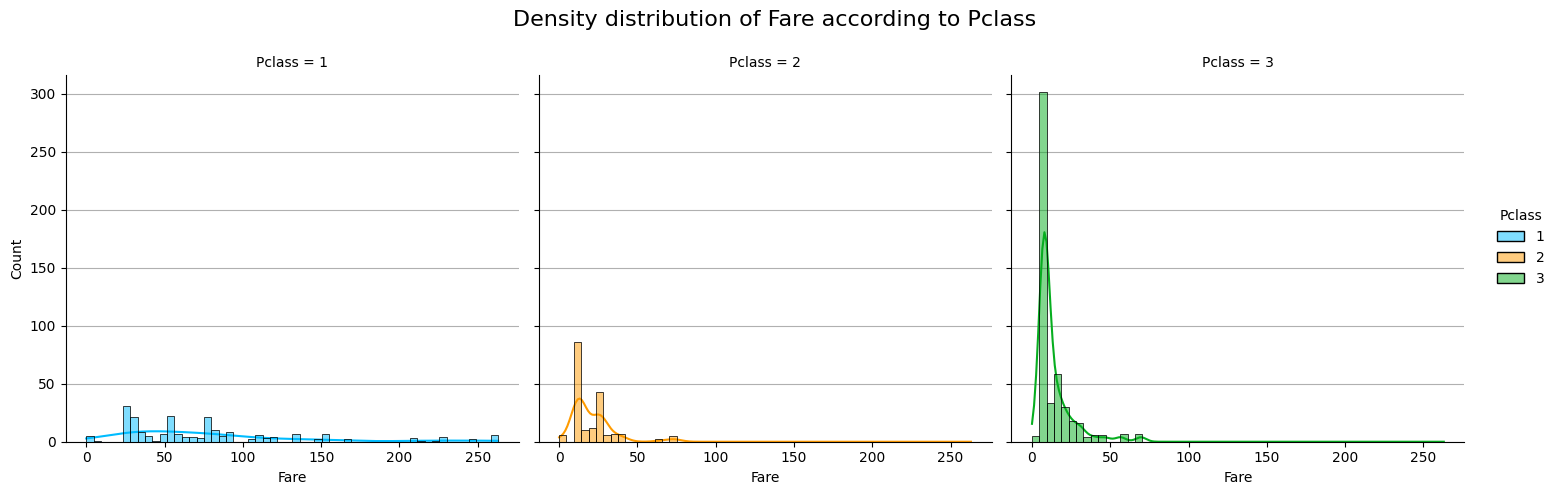

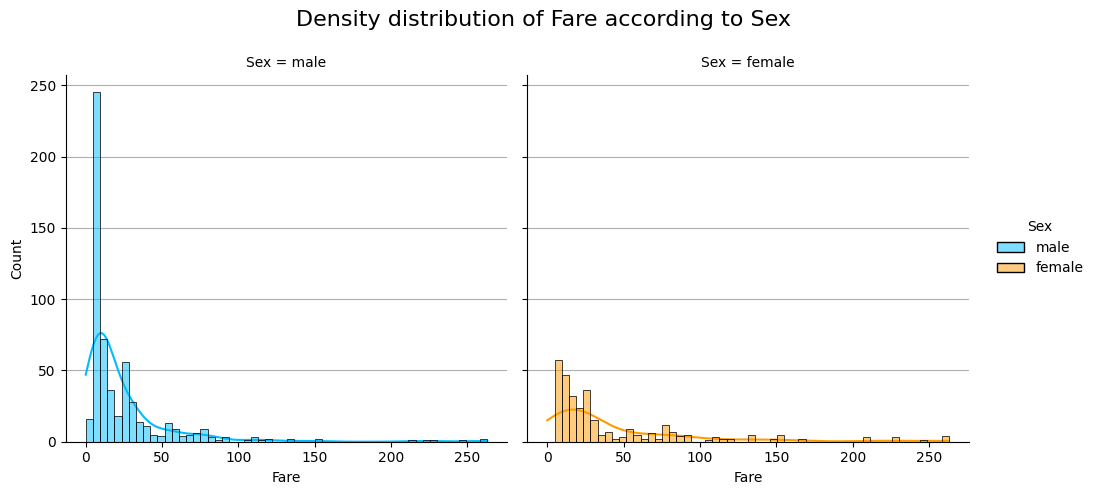

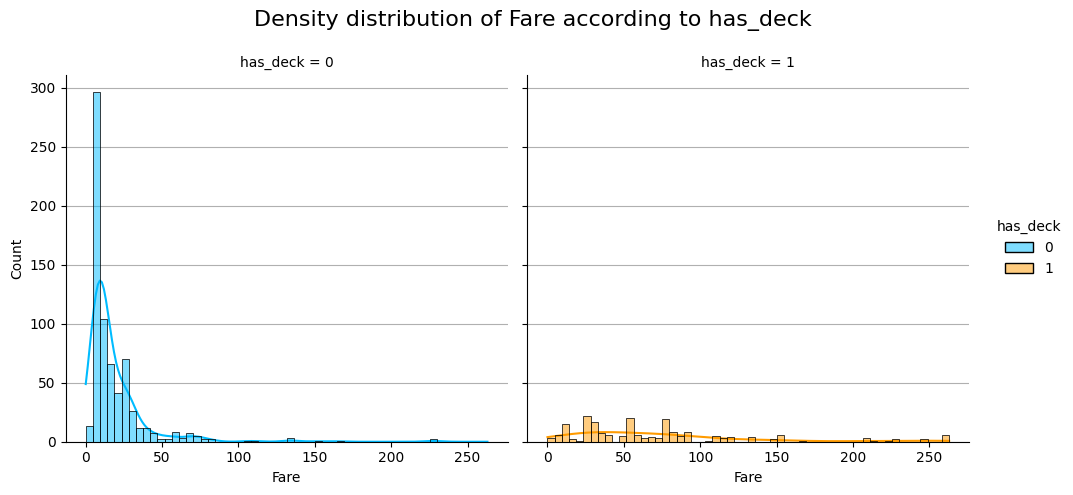

In [198]:
cath_variables = ['Survived', 'Pclass', 'Sex', 'has_deck']

num_variables = ['Age', 'Fare']

for num in num_variables:
    for cath in cath_variables:
        f.mixed_pairs(df, num, cath)

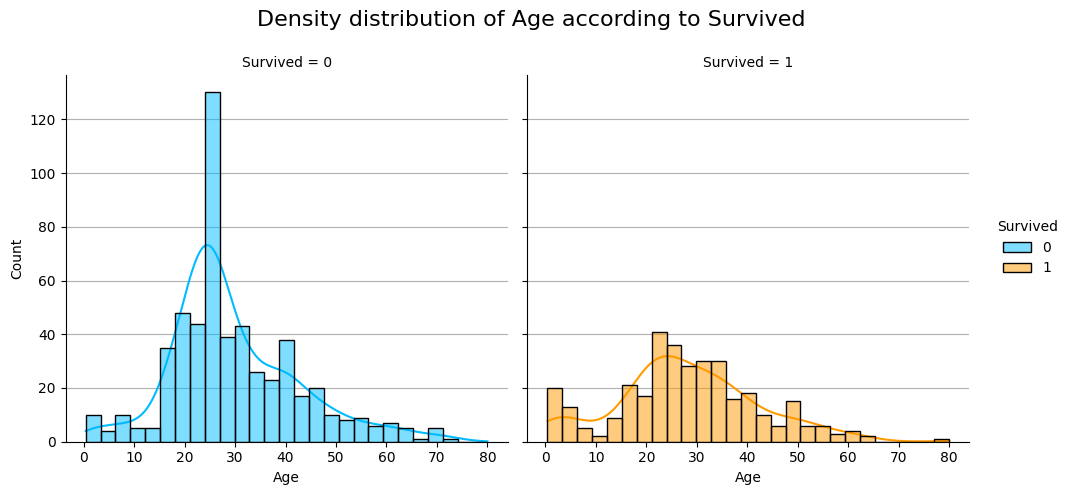

In [199]:
#Age/surivived
f.mixed_pairs(df = df, num_var = 'Age', cath_var = 'Survived')

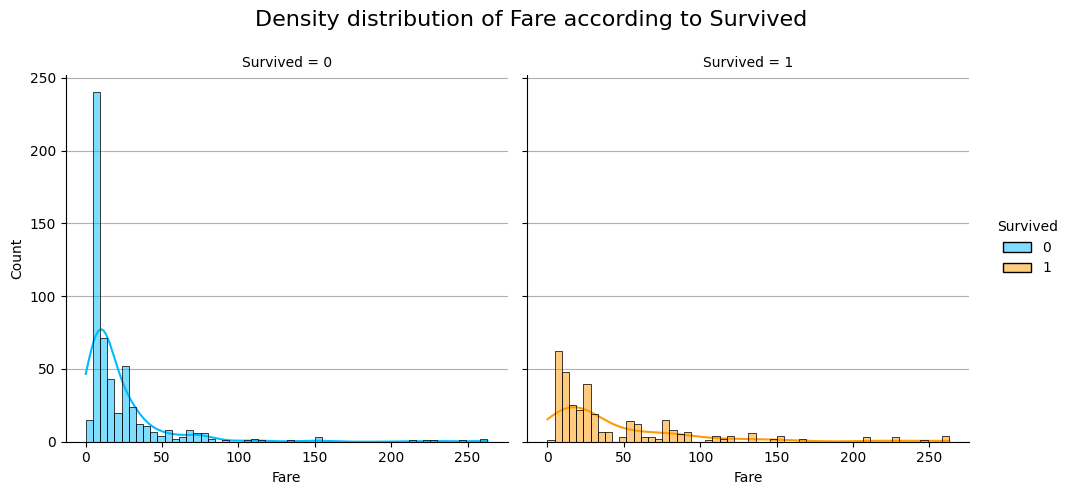

In [200]:
#No muy interesting

f.mixed_pairs(df = df, num_var = 'Fare', cath_var = 'Survived')


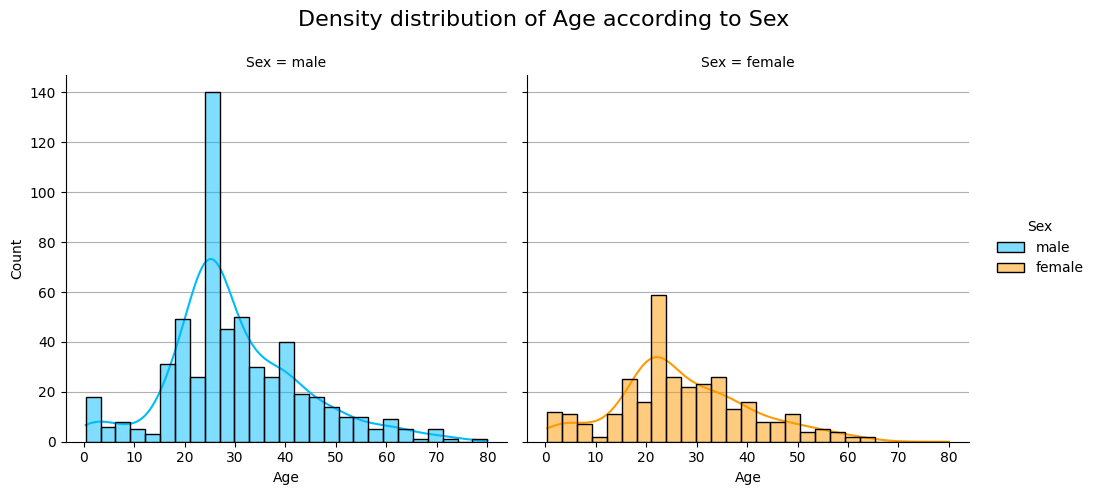

In [201]:
f.mixed_pairs(df = df, num_var = 'Age', cath_var = 'Sex')


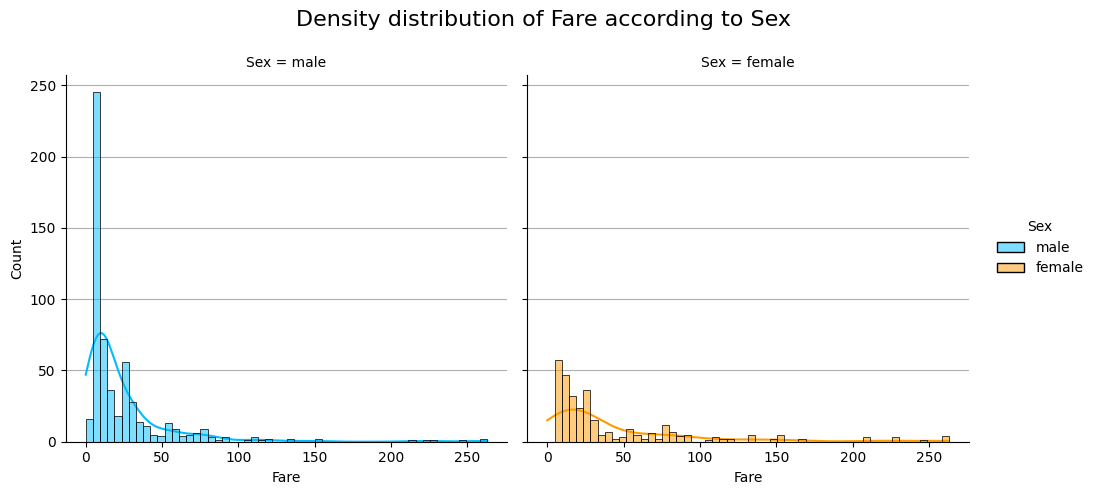

In [202]:
f.mixed_pairs(df = df, num_var = 'Fare', cath_var = 'Sex')


## Multivariate analysis


## Multivariate Analysis

In this section, we perform multivariate analysis on the Titanic dataset. The main steps include:

- **Trios Analysis**:
    - We analyze the relationships between three variables simultaneously to uncover more complex interactions.
    - Visualizations are created to understand how numerical variables vary across different categories and subcategories.
    - We are importing the function `mixed_trios` to construct the plots.

- **Correlation Matrices**:
    - We calculate and visualize the correlation matrices for numerical and encoded categorical variables.
    - This helps in identifying the strength and direction of relationships between variables.
    - We are importing the function `corr_matrix` to construct the plots.


### Survival/Age/Sex relationship  (Trios)

A ver, he hecho varias tablas que me han parecido interesantes. Luego se mira que se quiere contar, cual va a ser la historia, y con eso ya elegimos


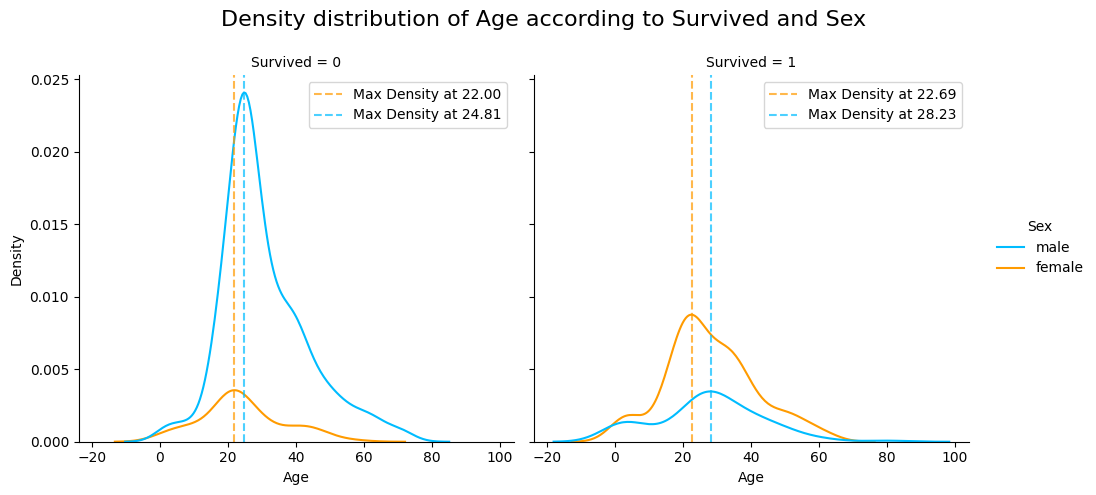

In [203]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Survived', cath_intra='Sex')


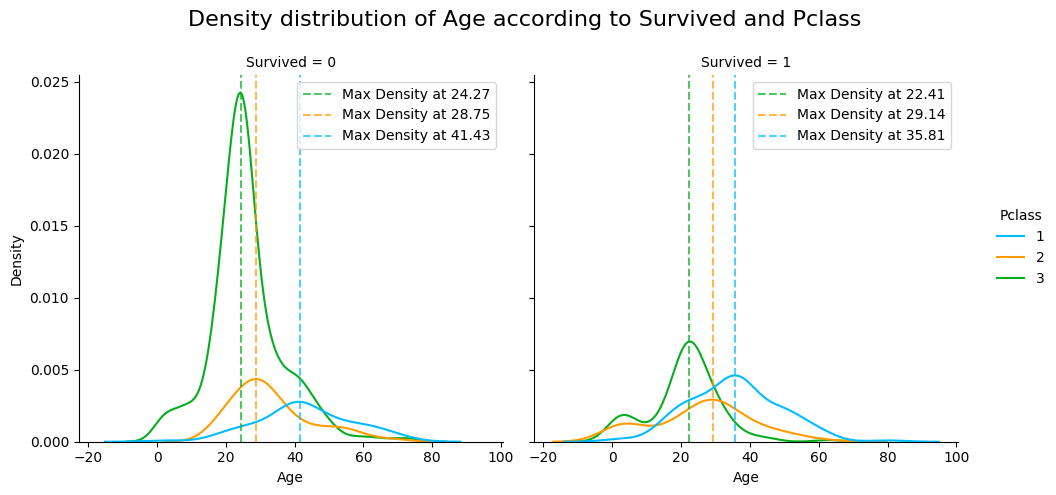

In [204]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Survived', cath_intra='Pclass')

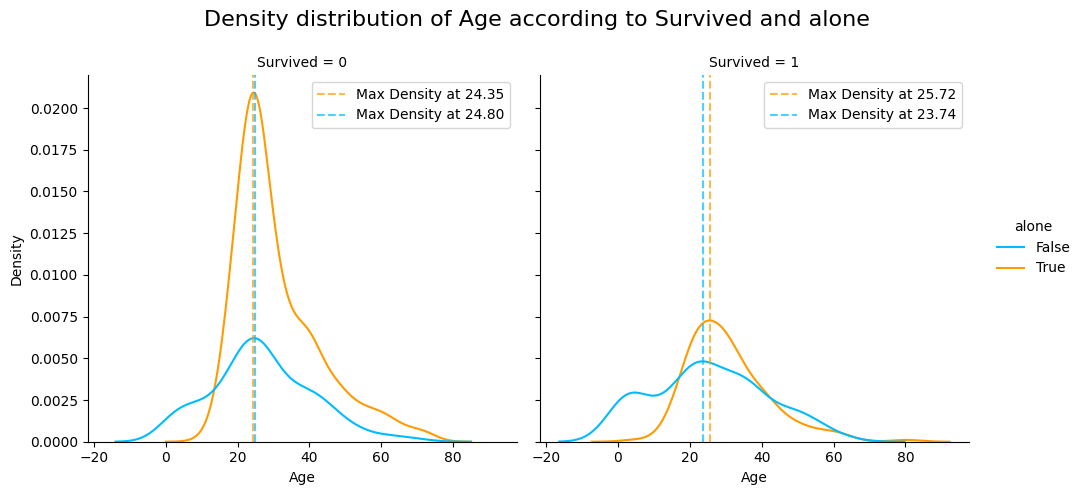

In [205]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Survived', cath_intra='alone')


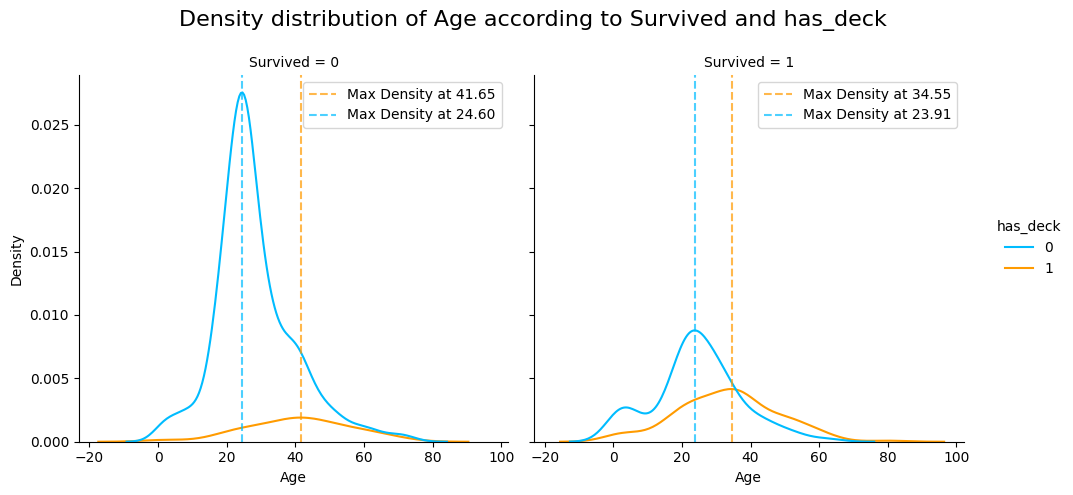

In [206]:
f.mixed_trios(df = df, num_var='Age', cath_inter = 'Survived', cath_intra='has_deck')


Quiero ver ahora mejor la relacion entre edad, sexo y supervivencia. Para ello creo una columna combinada

Queremos sacar mas informacion sobre la relacion Sex-Age-Survival, por lo que hacemos un grafico de violin

<Axes: xlabel='Survived', ylabel='Age'>

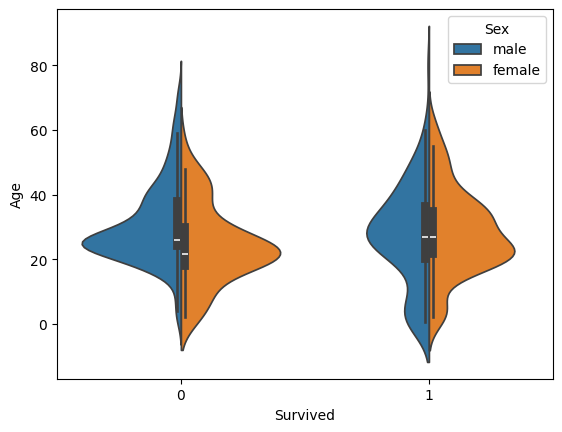

In [207]:
sns.violinplot(data=df, y="Age", x="Survived", hue="Sex", split=True)

A ver, realmente este, si llego a hacer el espacio interactivo, no lo necesitaria mucho, pq ahi podria ponerme a explorar

Pero bueno, tambien podria ser interesante convertirlo en funcion y poder usarlo para mirar un poco mas en profundidad. 

In [208]:
fig = px.violin(df, y="Age", x="Survived", color="Pclass", box=True, points="all", hover_data=df.columns, template="plotly_dark")

fig.show()

### Correlation matrixes

Para esto primero hemos de converitr las variables categoricas en formato string a formato numerico, para poder realizar calculos de correlación entre variables. Por tanto, hemos de convertir las variables Sex y Embarked.

Como en ambas variables tenemos pocos valores posibles (2 para sex y 3 para embarked) lo mejor seria hacer un one-hot encoding, para no crear un orden falso o relacion numerica erronea. 


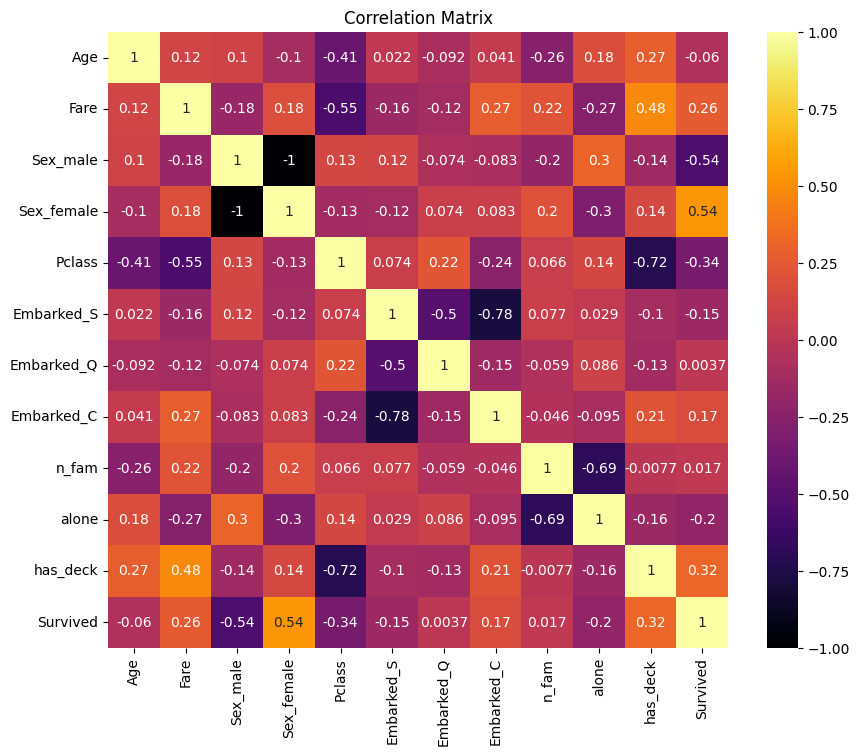

In [209]:
f.corr_matrix(df_encoded)

In [210]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'alone', 'deck',
       'n_fam', 'has_deck'],
      dtype='object')

In [211]:
# Función para extraer el apellido
def extract_surname(name):
    # El apellido generalmente aparece antes del primer coma
    return name.split(',')[0].strip()

# Aplicar la función para crear una nueva columna 'Surname'
df['Surname'] = df['Name'].apply(extract_surname)

In [212]:
# Agrupar por 'Surname' y 'Ticket'
family_groups = df.groupby(['Surname', 'Ticket'])

# Filtrar grupos que tengan más de un miembro
families = family_groups.filter(lambda x: len(x) > 1)

# Opcional: Asignar un ID de familia
families['FamilyID'] = families.groupby(['Surname', 'Ticket']).ngroup()

In [213]:
families['Name'][families['FamilyID'] == 98]



111     Zabour, Miss. Hileni
240    Zabour, Miss. Thamine
Name: Name, dtype: object

In [214]:
# Calcular el total de familiares por pasajero
families['TotalFamily'] = families['SibSp'] + families['Parch']

# Agrupar nuevamente para verificar
def verify_family(group):
    # El tamaño del grupo debe ser igual al TotalFamily de cada miembro + 1
    expected_size = group['TotalFamily'].max() + 1
    return len(group) == expected_size

# Filtrar grupos que cumplen con la verificación
verified_families = families.groupby(['Surname', 'Ticket']).filter(verify_family)

# Asignar nuevamente el ID de familia si es necesario
verified_families['FamilyID'] = verified_families.groupby(['Surname', 'Ticket']).ngroup()

In [215]:
print(verified_families[['PassengerId', 'Name', 'Surname', 'Ticket', 'SibSp', 'Parch', 'FamilyID']].head())

# Contar el número de familias
num_families = verified_families['FamilyID'].nunique()
print(f"Número de familias identificadas: {num_families}")

    PassengerId                                               Name    Surname  \
3             4       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle   
8             9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Johnson   
9            10                Nasser, Mrs. Nicholas (Adele Achem)     Nasser   
13           14                        Andersson, Mr. Anders Johan  Andersson   
34           35                            Meyer, Mr. Edgar Joseph      Meyer   

      Ticket  SibSp  Parch  FamilyID  
3     113803      1      0        14  
8     347742      0      2        27  
9     237736      1      0        35  
13    347082      1      5         1  
34  PC 17604      1      0        31  
Número de familias identificadas: 54
